In [ ]:
# Selection housekeeping genes
# Author: Guangrong Qin
# Date: 2023-Nov-7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BeatAML_var_mean = pd.read_csv("../Data/BeatAML_expr_variance_mean.csv")
ID_convert_table = pd.read_csv("../Data/Ensemble_symbol_annotation.csv", index_col="Unnamed: 0")
ID_convert_table.index =ID_convert_table['Node_1']
BeatAML_var_mean.index = BeatAML_var_mean['Gene']
BeatAML_var_mean = pd.concat([BeatAML_var_mean, ID_convert_table], axis = 1)


In [3]:
GTEx_var_mean = pd.read_csv("../Data/GTEx_Blood_expr_variance_mean.csv")

In [4]:
#The 375 housekeeping genes are from literature. 
HouseKeeping = pd.read_csv("../Data/HOUSE_KEEPING_GENE_SYMBOLS.csv",sep = ',')

In [5]:
def ID_convert_ensemble_symbol(Symbol_list):
    def read_dic():
        file = open('../Data/Ensemble_symbol_annotation.csv')
        dic_symbol_to_ensemble = {}
        dic_ensemble_to_symbol = {}
        for line in file.readlines():
            words = line.strip().split(",")
            ENSG = words[1]
            SYMB = words[2]
            dic_symbol_to_ensemble[SYMB] = ENSG
            dic_ensemble_to_symbol[ENSG] = SYMB
        return(dic_symbol_to_ensemble, dic_ensemble_to_symbol)
    
    dic_symbol_to_ensemble, dic_ensemble_to_symbol = read_dic()
    
    result_list = []
    for Gene in Symbol_list:
        if Gene in dic_symbol_to_ensemble:
            result_list.append(dic_symbol_to_ensemble[Gene])
        elif Gene in dic_ensemble_to_symbol:
            result_list.append(dic_ensemble_to_symbol[Gene])
        else:
            result_list.append(Gene)
    return(result_list)
            
            
def ID_convert_symbol_ensemble(symbol_list):
    ID_convert_table = pd.read_csv("../Data/Ensemble_symbol_annotation.csv", index_col="Unnamed: 0")
    result = ID_convert_table.loc[ID_convert_table['Node_2'].isin(symbol_list)]['Node_1'].values
    return(result)

def ID_convert_ensemble_symbol(ensemble_list):
    ID_convert_table = pd.read_csv("../Data/Ensemble_symbol_annotation.csv", index_col="Unnamed: 0")
    result = ID_convert_table.loc[ID_convert_table['Node_1'].isin(ensemble_list)]['Node_2'].values
    return(result)

In [7]:
#GeneSets = pd.read_csv("/Users/guangrong/Documents/GitHub_project/fastqpi_BigGIM/KGs/MsigDB/v7.4/KG_MSigDB_process.csv")

In [6]:
HouseKeeping = pd.read_csv("../Data/HOUSE_KEEPING_GENE_SYMBOLS.csv",sep = ',')
HouseKeeping_Symbols = list(HouseKeeping['Symbol'])
sele_df_normal = GTEx_var_mean.loc[GTEx_var_mean['Gene'].isin(HouseKeeping_Symbols)]
HouseKeeping_IDs = ID_convert_symbol_ensemble(HouseKeeping_Symbols)  

sele_df_AML = BeatAML_var_mean.loc[BeatAML_var_mean['Gene'].isin(HouseKeeping_IDs)]
sele_df_AML_sele = sele_df_AML.loc[sele_df_AML['Mean'] >= 0]
sele_df_AML_sele = sele_df_AML_sele.loc[sele_df_AML_sele['Var']<1]
sele_df_GTEx_sele = sele_df_normal.loc[sele_df_normal['Mean'] >= 0]
sele_df_GTEx_sele = sele_df_GTEx_sele.loc[sele_df_GTEx_sele['Var']<1]
print(sele_df_GTEx_sele.shape)
print(sele_df_AML_sele.shape)


(236, 3)
(258, 5)


In [7]:
selected_house_keeping_genes = list(set(sele_df_GTEx_sele['Gene']).intersection(set(ID_convert_ensemble_symbol(sele_df_AML_sele['Gene'].values))))

In [8]:
len(selected_house_keeping_genes)

205

In [9]:
selected_house_keeping_df = sele_df_AML_sele.loc[sele_df_AML_sele['Node_2'].isin(selected_house_keeping_genes)]

/Users/guangrong/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean of log(RPKM)')

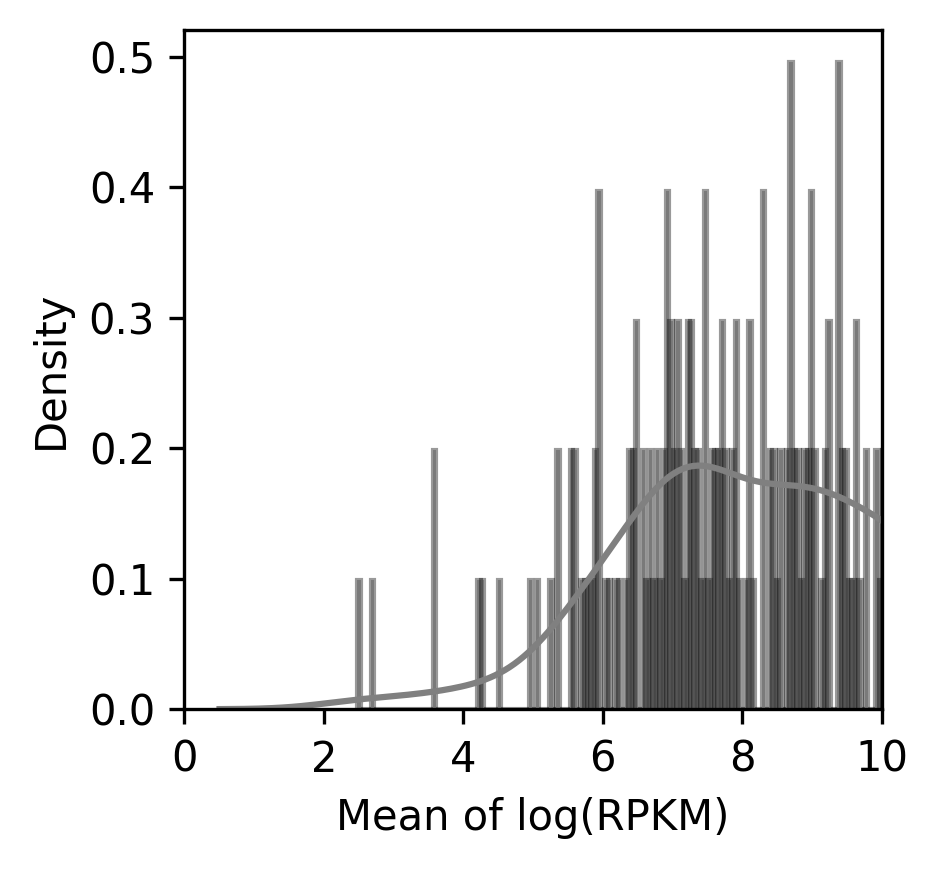

In [10]:
plt.figure(figsize=( 3,3)  , dpi=300)
plt.clf()
sns.distplot(selected_house_keeping_df['Mean'], 
             hist=True, kde=True, 
             bins=int(200), color = 'grey',
             hist_kws={'edgecolor':'black'}
            )
plt.xlim(0, 10)
plt.xlabel("Mean of log(RPKM)")

Text(0, 0.5, 'GTEx: Variance log(TPM+1)')

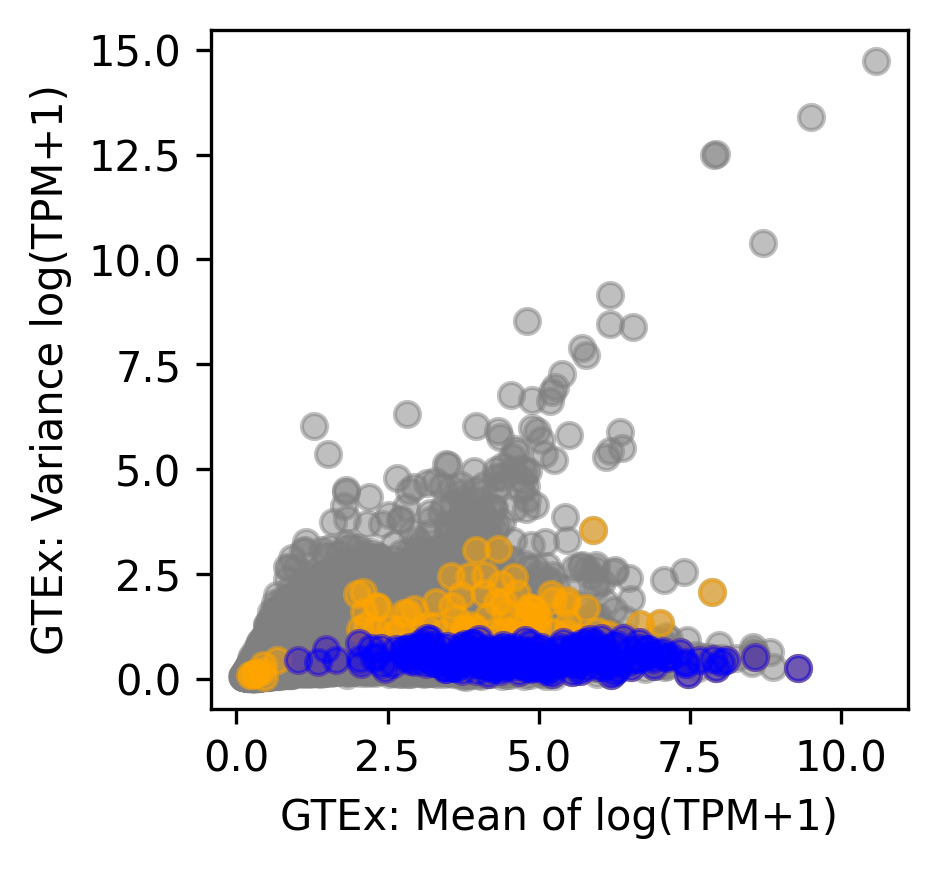

In [11]:
plt.figure(figsize=( 3,3)  , dpi=300)
#plt.ylim((-5, 40))

plt.scatter(GTEx_var_mean['Mean'],GTEx_var_mean['Var'],c = "grey", alpha = 0.5)

sele_df = GTEx_var_mean.loc[GTEx_var_mean['Gene'].isin(HouseKeeping_Symbols)]
plt.scatter(sele_df['Mean'],sele_df['Var'], c = "orange", alpha = 0.5)

sele_df1 = sele_df.loc[sele_df['Var'] <= 1]
sele_df1 = sele_df1.loc[sele_df1['Mean']>1]
plt.scatter(sele_df1['Mean'],sele_df1['Var'], c = "blue",alpha = 0.5)

#sele_df2 = GTEx_var_mean.loc[GTEx_var_mean['Gene'].isin(list(result_interaction1['SYMBOL']))]
#plt.scatter(sele_df2['Mean'],sele_df2['Var'], c = "red")

plt.xlabel("GTEx: Mean of log(TPM+1)")
plt.ylabel("GTEx: Variance log(TPM+1)")

Text(0, 0.5, 'BeatAML: Variance log(RPKM)')

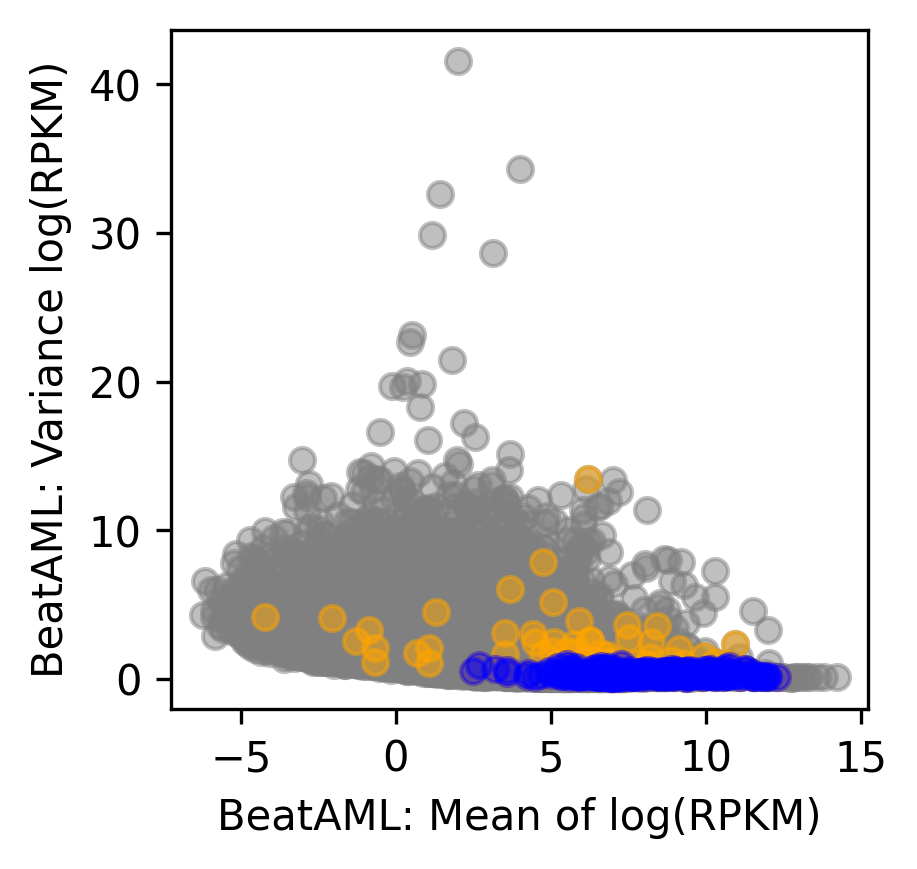

In [12]:
plt.figure(figsize=( 3,3)  , dpi=300)
#plt.ylim((-5, 40))

plt.scatter(BeatAML_var_mean['Mean'],BeatAML_var_mean['Var'],c = "grey", alpha = 0.5)

sele_df = BeatAML_var_mean.loc[BeatAML_var_mean['Node_2'].isin(HouseKeeping_Symbols)]
plt.scatter(sele_df['Mean'],sele_df['Var'], c = "orange", alpha = 0.5)

sele_df1 = sele_df.loc[sele_df['Var'] <= 1]
sele_df1 = sele_df1.loc[sele_df1['Mean']>1]
plt.scatter(sele_df1['Mean'],sele_df1['Var'], c = "blue",alpha = 0.5)

#sele_df2 = GTEx_var_mean.loc[GTEx_var_mean['Gene'].isin(list(result_interaction1['SYMBOL']))]
#plt.scatter(sele_df2['Mean'],sele_df2['Var'], c = "red")

plt.xlabel("BeatAML: Mean of log(RPKM)")
plt.ylabel("BeatAML: Variance log(RPKM)")

In [13]:
# selection of housekeeping genes to construct relative gene expression features

curr_sele = selected_house_keeping_df.loc[selected_house_keeping_df['Node_2'].isin(selected_house_keeping_genes)]
curr_sele = curr_sele.loc[curr_sele['Var']<0.5]
cur_mean = 2
interval = 1
Final_selection = []
while cur_mean < 13:
    print(cur_mean)
    curr_sele = curr_sele.loc[curr_sele['Mean'] > cur_mean]
    curr_sele_interval = curr_sele.loc[curr_sele['Mean'] < cur_mean + interval]
    curr_sele_interval.sort_values(by = ['Var'])
    if curr_sele_interval.shape[0] >=1:
        cur_gene = curr_sele_interval.sort_values(by = ['Var'])['Node_2'].values[0]
        Final_selection.append(cur_gene)
        cur_mean = curr_sele_interval.loc[curr_sele_interval['Node_2'] == cur_gene]['Mean'].values[0]
    else:
        cur_mean = cur_mean + interval
    


2
3
3.6001761325731363
4.49959264904802
5.367984476346489
6.205269139262295
7.195129791627964
7.595247537003348
8.083092292721927
8.938488576587527
9.368899178029526
9.915636502446157
10.575590073777253
11.527864775140667
11.783831697029973
11.998411897911012
12.317755486211086


In [14]:
print(len(Final_selection))

Final_selection

15


['RPS10',
 'FNTA',
 'COX6A1',
 'BECN1',
 'SF3B2',
 'PSMB2',
 'AUP1',
 'SRP14',
 'HNRNPK',
 'CCNI',
 'RHOA',
 'PABPC1',
 'RPS11',
 'TPT1',
 'FTL']

In [15]:
selected_house_keeping_df.loc[selected_house_keeping_df['Node_2'].isin(Final_selection)].sort_values(by = ['Mean'])

,Gene,Var,Mean,Node_1,Node_2
ENSG00000124614,ENSG00000124614,0.423522,3.600176,ENSG00000124614,RPS10
ENSG00000168522,ENSG00000168522,0.110316,4.499593,ENSG00000168522,FNTA
ENSG00000111775,ENSG00000111775,0.175438,5.367984,ENSG00000111775,COX6A1
ENSG00000126581,ENSG00000126581,0.101004,6.205269,ENSG00000126581,BECN1
ENSG00000087365,ENSG00000087365,0.078160,7.195130,ENSG00000087365,SF3B2
ENSG00000126067,ENSG00000126067,0.103927,7.595248,ENSG00000126067,PSMB2
ENSG00000115307,ENSG00000115307,0.105289,8.083092,ENSG00000115307,AUP1
ENSG00000140319,ENSG00000140319,0.091371,8.938489,ENSG00000140319,SRP14
ENSG00000165119,ENSG00000165119,0.069220,9.368899,ENSG00000165119,HNRNPK
ENSG00000118816,ENSG00000118816,0.117126,9.915637,ENSG00000118816,CCNI


Text(0, 0.5, 'BeatAML: Variance')

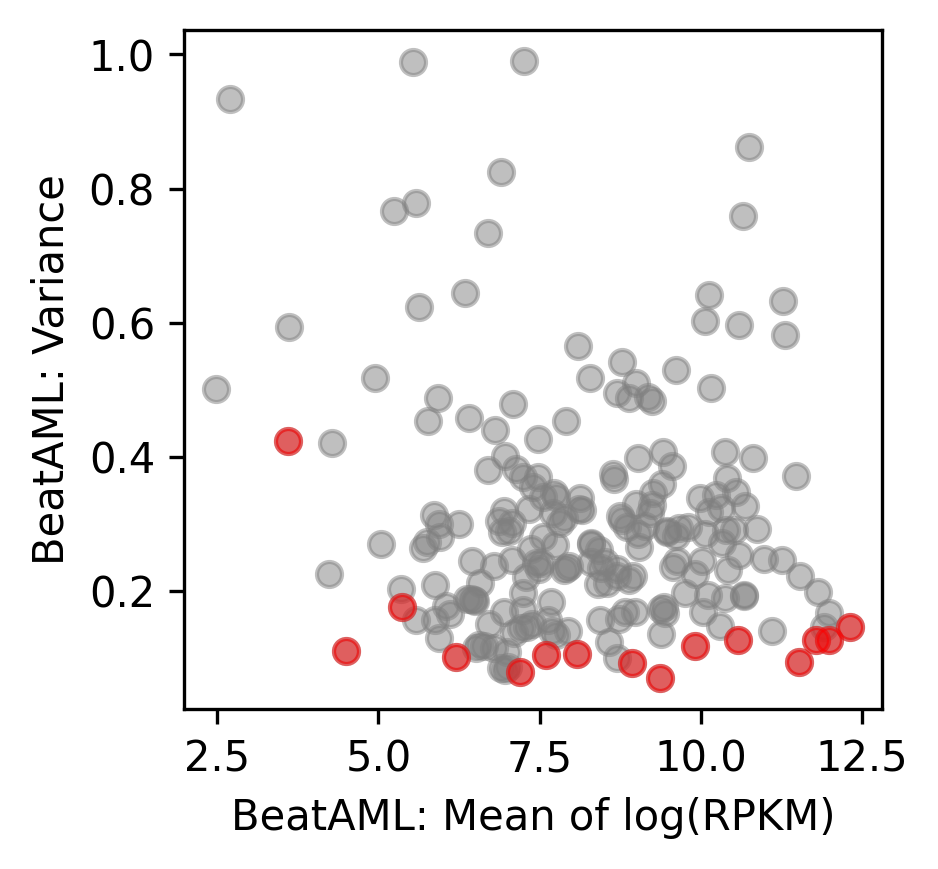

In [16]:
plt.figure(figsize=( 3,3)  , dpi=300)
#plt.ylim((-5, 40))
curr_sele = selected_house_keeping_df.loc[selected_house_keeping_df['Node_2'].isin(selected_house_keeping_genes)]

plt.scatter(curr_sele['Mean'],curr_sele['Var'],c = "grey", alpha = 0.5)

#Final_selection = ["GPS2", "RPS10","ZNF91","FNTA","PSMC1","GPS1",
# "MLH1","ARAF","SF3B2","PSMD2","SRP14","GNB1","HNRNPK","ARF1","RPS11"]

curr_sele = selected_house_keeping_df.loc[selected_house_keeping_df['Node_2'].isin(Final_selection)]

plt.scatter(curr_sele['Mean'],curr_sele['Var'],c = "red", alpha = 0.5)
                   
plt.xlabel("BeatAML: Mean of log(RPKM)")
plt.ylabel("BeatAML: Variance")

# END